In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import graphviz
import pydotplus
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Space Server Dataset.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df.info

<bound method DataFrame.info of              objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid 

In [4]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [5]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [6]:
df.shape

(10000, 18)

In [7]:
#Check if there are any null values in dataset
df.isnull().values.any()

False

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
objid,10000.0,1.237650e+18,1.577039e+05,1.237650e+18,1.237650e+18,1.237650e+18,1.237650e+18,1.237650e+18
ra,10000.0,1.755300e+02,4.778344e+01,8.235100e+00,1.573709e+02,1.803945e+02,2.015473e+02,2.608844e+02
dec,10000.0,1.483615e+01,2.521221e+01,-5.382632e+00,-5.390350e-01,4.041660e-01,3.564940e+01,6.854227e+01
u,10000.0,1.861936e+01,8.286560e-01,1.298897e+01,1.817804e+01,1.885309e+01,1.925923e+01,1.959990e+01
g,10000.0,1.737193e+01,9.454572e-01,1.279955e+01,1.681510e+01,1.749513e+01,1.801015e+01,1.991897e+01
r,10000.0,1.684096e+01,1.067764e+00,1.243160e+01,1.617333e+01,1.685877e+01,1.751268e+01,2.480204e+01
i,10000.0,1.658358e+01,1.141805e+00,1.194721e+01,1.585370e+01,1.655499e+01,1.725855e+01,2.817963e+01
z,10000.0,1.642283e+01,1.203188e+00,1.161041e+01,1.561829e+01,1.638995e+01,1.714145e+01,2.283306e+01
run,10000.0,9.810348e+02,2.733050e+02,3.080000e+02,7.520000e+02,7.560000e+02,1.331000e+03,1.412000e+03
rerun,10000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


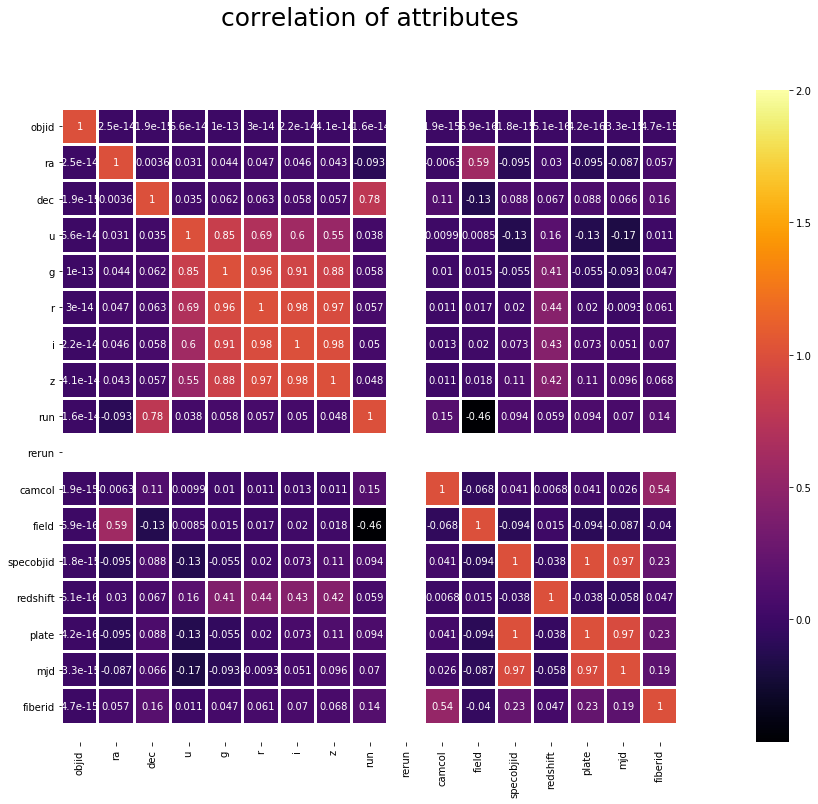

In [9]:
# Heat map represents of correlation between the various attributes
colormap=plt.cm.inferno # color range to be used in heat map
plt.figure(figsize=(28,12))
plt.title('correlation of attributes',y=1.09, size=25)
sns.heatmap(df.corr(),linewidths=2,vmax=2,square=True,cmap=colormap,linecolor='white',annot=True)

# snippet to overcome the top and bottom row breaking cells(matplotlib version specfic issue)
b,t = plt.ylim()# discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b,t)# update the ylim(bottom,top)values
plt.show()

In [10]:
# Drop useless columns
df =df.drop(columns=['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid'])

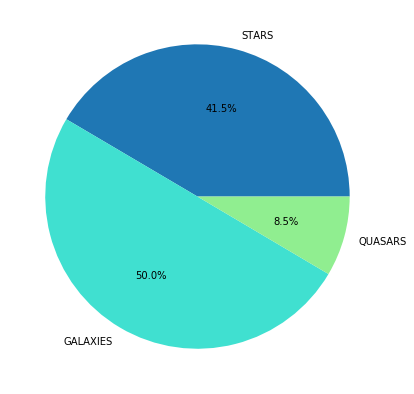

In [20]:
stars_df = df.loc[df['class'] == 'STAR']
galaxies_df =df.loc[df['class'] == 'GALAXY']
quasars_df = df.loc[df['class'] == 'QSO']


labels= ['STARS', 'GALAXIES', 'QUASARS']
sizes = [len(stars_df)/100, len(galaxies_df)/100, len(quasars_df)/100]
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', colors=['C0', 'turquoise', 'lightgreen'])
plt.show()

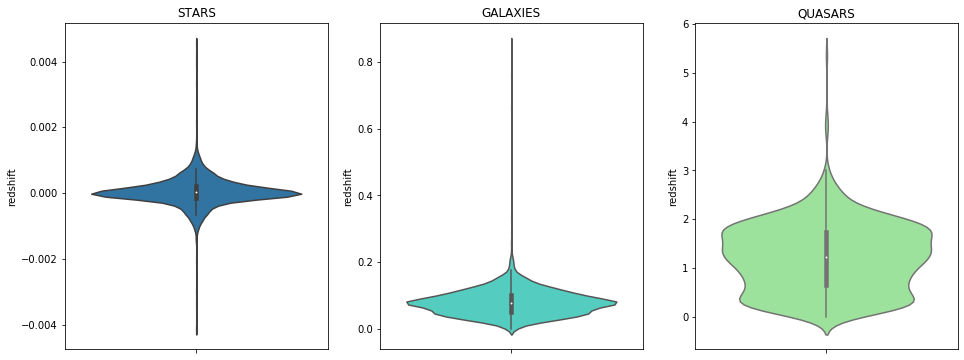

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 6))
ax = sns.violinplot(y="redshift", data=stars_df, ax = axes[0])
ax.set_title("STARS")
ax = sns.violinplot(y="redshift", data=galaxies_df, ax = axes[1], color="turquoise")
ax.set_title("GALAXIES")
ax = sns.violinplot(y="redshift", data=quasars_df, ax = axes[2], color="lightgreen")
ax.set_title("QUASARS")
print()

In [11]:
df.head(2)

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055


In [12]:
# Separate the variables
sdss_labels = df['class']
sdss_features =df.drop(['class'], axis=1)


#Initialize training data
X_train = sdss_features.values[:8000]
Y_train = sdss_labels.values[:8000]

#Initialize test data
X_test = sdss_features.values[8000: 9999]
Y_test = sdss_labels.values[8000: 9999]

In [13]:
# Train a decision tree classifier on the data
dtree_clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
dtree_clf.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
# Visualize the decision tree
dot_data = tree.export_graphviz(dtree_clf, out_file=None, 
                      feature_names=sdss_features.columns.values,  
                      class_names=['STAR', 'GALAXY', 'QSO'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"11,11!"')
pydot_graph.write_png('resized_tree.png')

True

In [15]:
# Evaluate accuracy of decision tree classifier
predictions = dtree_clf.predict(X_test)
accuracy = (predictions == Y_test).sum() / len(predictions) * 100
print("Accuracy: " + str(accuracy))

Accuracy: 98.64932466233117


classification with SVM

In [16]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, Y_train)

predictions = svm_clf.predict(X_test)
accuracy = (predictions == Y_test).sum() / len(predictions) * 100
print("Accuracy: " + str(accuracy))

Accuracy: 46.47323661830916


In [17]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, Y_train)

predictions = svm_clf.predict(X_test)
accuracy = (predictions == Y_test).sum() / len(predictions) * 100
print("Accuracy: " + str(accuracy))

Accuracy: 96.8984492246123


In [18]:
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(X_train, Y_train)
predictions= knn_clf.predict(X_test)
accuracy = (predictions == Y_test).sum() / len(predictions) * 100
print("Accuracy: " + str(accuracy))

Accuracy: 74.43721860930465


In [19]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
predictions = nb_clf.predict(X_test)
accuracy = (predictions == Y_test).sum() / len(predictions) * 100
print("Accuracy: " + str(accuracy))

Accuracy: 97.54877438719359


Decision Tree: 98.65%
Gaussian Naive-Bayes: 97.55%
Kernelized SVM: 96.90%
K-Nearest-Neighbor: 74.44%
Unkernelized SVM: 46.47%